In [2]:
import csv
import time
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [3]:
df = pd.read_csv("./match_data/sapp/sapp_2020.csv")

In [4]:
for s in ('send','kasm','uraw','kasw','fctk',"ka-f","y-fm",'y-fc','shon','shim','nago','g-os','c-os','kobe','hiro','toku','fuku','tosu','oita'):
    df_s = pd.read_csv(f"./match_data/{s}/{s}_2020.csv")
    df = pd.concat([df, df_s])


In [5]:
df= df.reset_index(drop=True)

In [6]:
df

,節,開催日,曜日,相手,スコア,得点,失点,勝敗,H/A,会場,...,チャンス構築率,シュート,シュート成功率,支配率,攻撃CBP,パスCBP,奪取P,守備P,得点者,指揮官
0,1,2020-02-22,(土),柏,2-4,2,4,2,1,三協Ｆ柏,...,0.173,27,0.074,0.506,24.59,15.50,106.59,13.83,"['荒野', '鈴木']",ペトロヴィッチ
1,2,2020-07-04,(土),横浜FC,2-1,2,1,1,1,ニッパツ,...,0.111,12,0.167,0.427,15.91,12.13,71.45,15.38,['鈴木x2'],ペトロヴィッチ
2,3,2020-07-08,(水),鹿島,2-0,2,0,1,1,カシマ,...,0.065,7,0.286,0.462,13.19,11.99,76.32,17.79,"['鈴木', 'Ｌフェルナンデス']",ペトロヴィッチ
3,4,2020-07-12,(日),湘南,0-0,0,0,0,1,ＢＭＷス,...,0.067,7,0.000,0.474,16.32,13.93,70.91,14.59,[''],ペトロヴィッチ
4,5,2020-07-18,(土),仙台,2-2,2,2,0,1,ユアスタ,...,0.136,15,0.133,0.504,15.33,12.20,61.17,14.91,"['チャナティップ', '田中']",ペトロヴィッチ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,31,2020-12-06,(日),仙台,0-2,0,2,2,0,昭和電ド,...,0.061,7,0.000,0.707,16.49,15.32,102.31,7.85,[''],片野坂 知宏
692,27,2020-12-09,(水),柏,1-1,1,1,0,1,三協Ｆ柏,...,0.059,7,0.143,0.590,13.74,11.84,81.28,16.68,['岩田'],片野坂 知宏
693,32,2020-12-12,(土),札幌,1-1,1,1,0,0,昭和電ド,...,0.076,9,0.111,0.441,10.22,8.44,90.55,18.38,['野村'],片野坂 知宏
694,33,2020-12-16,(水),湘南,2-1,2,1,1,1,ＢＭＷス,...,0.118,13,0.154,0.521,14.48,12.42,94.76,13.70,"['高澤', '伊佐']",片野坂 知宏


In [7]:

X=[df["得点"].values]

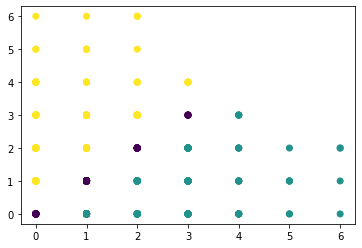

In [8]:
plt.scatter(df["得点"],df["失点"],c=df["勝敗"])

In [138]:
df_w=df[df["勝敗"]==1]
df_d=df[df["勝敗"]==0]
df_l=df[df["勝敗"]==2]

In [139]:
x_w = df_w["KAGI"].values
x_d = df_d["KAGI"].values
x_l = df_l["KAGI"].values

In [140]:
y_w = df_w["守備P"].values
y_d = df_d["守備P"].values
y_l = df_l["守備P"].values

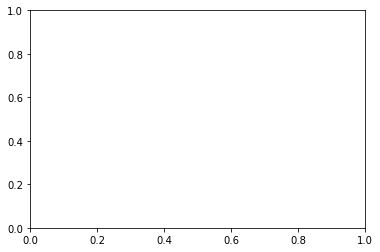

In [141]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

In [142]:
ax.scatter(x_w,y_w,c="red",label="win",alpha=0.5)
ax.scatter(x_d,y_d,c="green", label="drow",alpha=0.5)
ax.scatter(x_l,y_l,c="blue", label="lose",alpha=0.5)

In [143]:
ax.set_xlabel('kagi')
ax.set_ylabel('defensive P')


ax.grid(True)
ax.legend(loc='upper left')

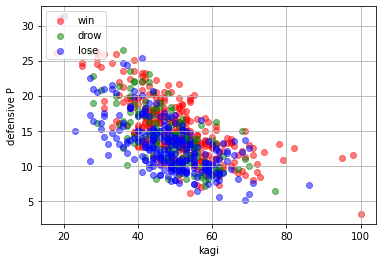

In [144]:
fig

/home/yokoyama/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31680 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yokoyama/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24471 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yokoyama/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yokoyama/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yokoyama/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21213 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yokoyama/anaconda3/lib/python3.8/site-packages/matplotlib/backends/ba

/home/yokoyama/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22890 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/yokoyama/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21462 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/yokoyama/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 23432 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/yokoyama/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20633 missing from current font.
  font.set_text(s, 0, flags=flags)


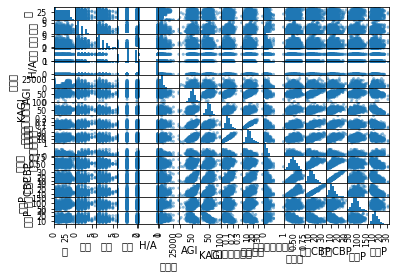

In [18]:
grr = pd.plotting.scatter_matrix(df)

In [19]:
grr

array([[<AxesSubplot:xlabel='節', ylabel='節'>,
        <AxesSubplot:xlabel='得点', ylabel='節'>,
        <AxesSubplot:xlabel='失点', ylabel='節'>,
        <AxesSubplot:xlabel='勝敗', ylabel='節'>,
        <AxesSubplot:xlabel='H/A', ylabel='節'>,
        <AxesSubplot:xlabel='観客数', ylabel='節'>,
        <AxesSubplot:xlabel='AGI', ylabel='節'>,
        <AxesSubplot:xlabel='KAGI', ylabel='節'>,
        <AxesSubplot:xlabel='チャンス構築率', ylabel='節'>,
        <AxesSubplot:xlabel='シュート', ylabel='節'>,
        <AxesSubplot:xlabel='シュート成功率', ylabel='節'>,
        <AxesSubplot:xlabel='支配率', ylabel='節'>,
        <AxesSubplot:xlabel='攻撃CBP', ylabel='節'>,
        <AxesSubplot:xlabel='パスCBP', ylabel='節'>,
        <AxesSubplot:xlabel='奪取P', ylabel='節'>,
        <AxesSubplot:xlabel='守備P', ylabel='節'>],
       [<AxesSubplot:xlabel='節', ylabel='得点'>,
        <AxesSubplot:xlabel='得点', ylabel='得点'>,
        <AxesSubplot:xlabel='失点', ylabel='得点'>,
        <AxesSubplot:xlabel='勝敗', ylabel='得点'>,
        <AxesSubplot:xlabel='H/

In [24]:
df.columns

Index(['節', '開催日', '曜日', '相手', 'スコア', '得点', '失点', '勝敗', 'H/A', '会場', '観客数',
       '天候', 'AGI', 'KAGI', 'チャンス構築率', 'シュート', 'シュート成功率', '支配率', '攻撃CBP',
       'パスCBP', '奪取P', '守備P', '得点者', '指揮官'],
      dtype='object')

In [148]:
df_ = df.drop([ 'チャンス構築率','奪取P','失点', 'パスCBP', 'シュート成功率','シュート','支配率','得点', '節', '開催日', '曜日', '相手', 'スコア','勝敗', 'H/A', '会場', '観客数', '天候','得点者', '指揮官'],axis=1)

In [149]:
df_

,AGI,KAGI,攻撃CBP,守備P
0,61,44,24.59,13.83
1,48,41,15.91,15.38
2,34,53,13.19,17.79
3,50,50,16.32,14.59
4,49,45,15.33,14.91
...,...,...,...,...
691,51,49,16.49,7.85
692,32,52,13.74,16.68
693,45,49,10.22,18.38
694,41,49,14.48,13.70


Index(['AGI', 'KAGI', '攻撃CBP', '守備P'], dtype='object')

/home/yokoyama/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25915 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yokoyama/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25731 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yokoyama/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yokoyama/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yokoyama/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25915 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/yokoyama/anaconda3/lib/python3.8/site-packages/matplotlib/backends/back

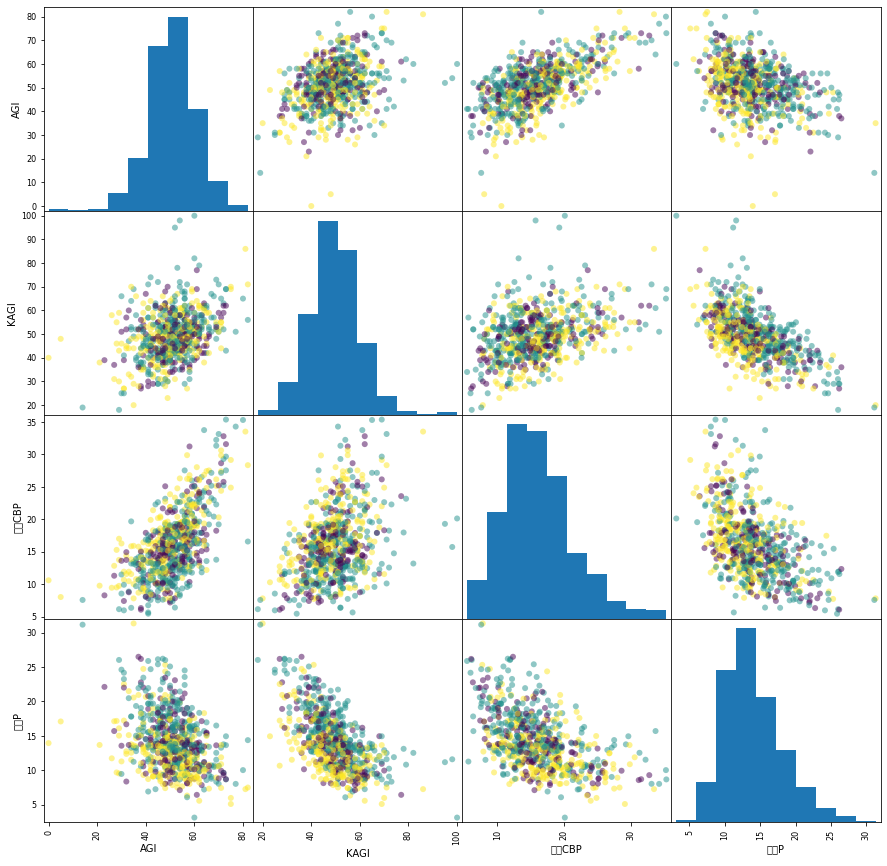

In [150]:
grr = pd.plotting.scatter_matrix(df_ ,figsize=(15,15), c=df["勝敗"],marker="o")
df_.columns